In [293]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

In [306]:
#Just presenting the data to be clustered
df = pd.read_excel('phi_clustering_data.xlsx','Sheet1')
print(df.shape)
df

(57, 9)


,Name,Type,Mass(ME),Radius(RE),Flux(SE),Tsurf(K),Period(days),Distance(ly),ESI
0,001.iTeegarden'sStarb,M-WarmTerran,1.05,1.02,1.15,298,4.90,12.0,0.95
1,002.iTOI-700d,M-WarmTerran,1.57,1.14,0.87,278,37.40,101.0,0.93
2,003.iKepler-1649c,M-WarmTerran,1.20,1.06,1.23,303,19.50,301.0,0.92
3,004.iTRAPPIST-1d,M-WarmSubterran,0.39,0.78,1.12,296,4.00,41.0,0.91
4,005.iProximaCenb,M-WarmTerran,1.27,1.08,0.70,257,11.20,4.2,0.87
5,006.iK2-72e,M-WarmTerran,2.21,1.29,1.30,307,24.20,217.0,0.87
6,007.iGJ1061d,M-WarmTerran,1.64,1.15,0.69,247,13.00,12.0,0.86
7,008.iGJ1061c,M-WarmTerran,1.74,1.18,1.45,311,6.70,12.0,0.86
8,009.iRoss128b,M-WarmTerran,1.40,1.11,1.48,317,9.90,11.0,0.86
9,010.iGJ273b,M-WarmTerran,2.89,1.51,1.06,292,18.60,19.0,0.85


In [307]:
# Name and Type have strings as data, and cannot be clustered. Hence, these can be excluded.
clustering_list = df.drop(['Name','Type','ESI'],axis = 1)
clustering_list.head()

,Mass(ME),Radius(RE),Flux(SE),Tsurf(K),Period(days),Distance(ly)
0,1.05,1.02,1.15,298,4.9,12.0
1,1.57,1.14,0.87,278,37.4,101.0
2,1.20,1.06,1.23,303,19.5,301.0
3,0.39,0.78,1.12,296,4.0,41.0
4,1.27,1.08,0.70,257,11.2,4.2


In [308]:
clustering_list.describe()

,Mass(ME),Radius(RE),Flux(SE),Tsurf(K),Period(days),Distance(ly)
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,4.123158,1.800877,0.878947,271.508772,77.941228,568.143860
std,2.310975,0.568944,0.383195,33.954866,86.130475,921.716792
min,0.390000,0.780000,0.250000,204.000000,4.000000,0.000000
25%,2.210000,1.290000,0.590000,249.000000,18.600000,24.000000
50%,3.970000,1.800000,0.880000,278.000000,38.100000,66.000000
75%,5.660000,2.220000,1.170000,299.000000,112.300000,865.000000
max,9.440000,3.040000,1.640000,325.000000,384.800000,4973.000000


In [310]:
#Normalizing the categories with different ranges to avoid disproportionate clustering.
scaler = preprocessing.MinMaxScaler()
clustering_list_normal = scaler.fit_transform(clustering_list)


In [311]:
pd.DataFrame(clustering_list_normal).describe()
#Now, all variables are scaled between 0 and 1.

,0,1,2,3,4,5
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,0.412504,0.451716,0.452480,0.557924,0.194173,0.114246
std,0.255356,0.251745,0.275680,0.280619,0.226183,0.185344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.201105,0.225664,0.244604,0.371901,0.038340,0.004826
50%,0.395580,0.451327,0.453237,0.611570,0.089548,0.013272
75%,0.582320,0.637168,0.661871,0.785124,0.284401,0.173939
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [312]:
#Trying to find ideal k by attempting to plot elbow
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    KMeans(n_clusters=k).fit(clustering_list_normal)
    kmeanModel.fit(clustering_list_normal)
    inertia.append(kmeanModel.inertia_)

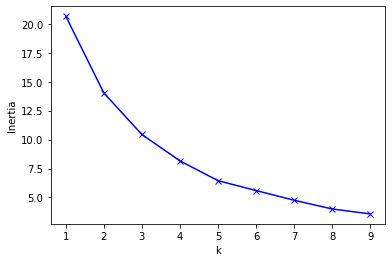

In [353]:
#Plotting the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()
#Choosing k=4 based on the graph

In [488]:
kmeans = KMeans(n_clusters=4).fit(clustering_list_normal)

In [489]:
cluster = pd.DataFrame(kmeans.labels_)
#making the cluster output a dataframe to concatenate it with the original data
clustered_list = pd.concat((clustering_list,cluster),axis = 1)
clustered_list = clustered_list.rename({0:'cluster'},axis=1)

In [490]:
clustered_list.head()

,Mass(ME),Radius(RE),Flux(SE),Tsurf(K),Period(days),Distance(ly),cluster
0,1.05,1.02,1.15,298,4.9,12.0,0
1,1.57,1.14,0.87,278,37.4,101.0,0
2,1.20,1.06,1.23,303,19.5,301.0,0
3,0.39,0.78,1.12,296,4.0,41.0,0
4,1.27,1.08,0.70,257,11.2,4.2,1


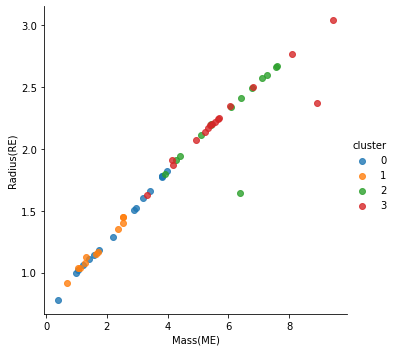

In [492]:
#There are 4 clusters of points in a 5-dimensional space.
#Visualization
#Plotting ESI vs. Mass to get a sense of what qualities can be observed in a cluster.
sns.lmplot(x = 'Mass(ME)',y = 'Radius(RE)', data = clustered_list, hue = 'cluster', fit_reg = False)
#In this plot, it can be observed that planets with a mass lesser than or equal to 2.25 Earth-Masses and with Earth-Radii between 0.8 and 1.50 seem to make the first cluster.

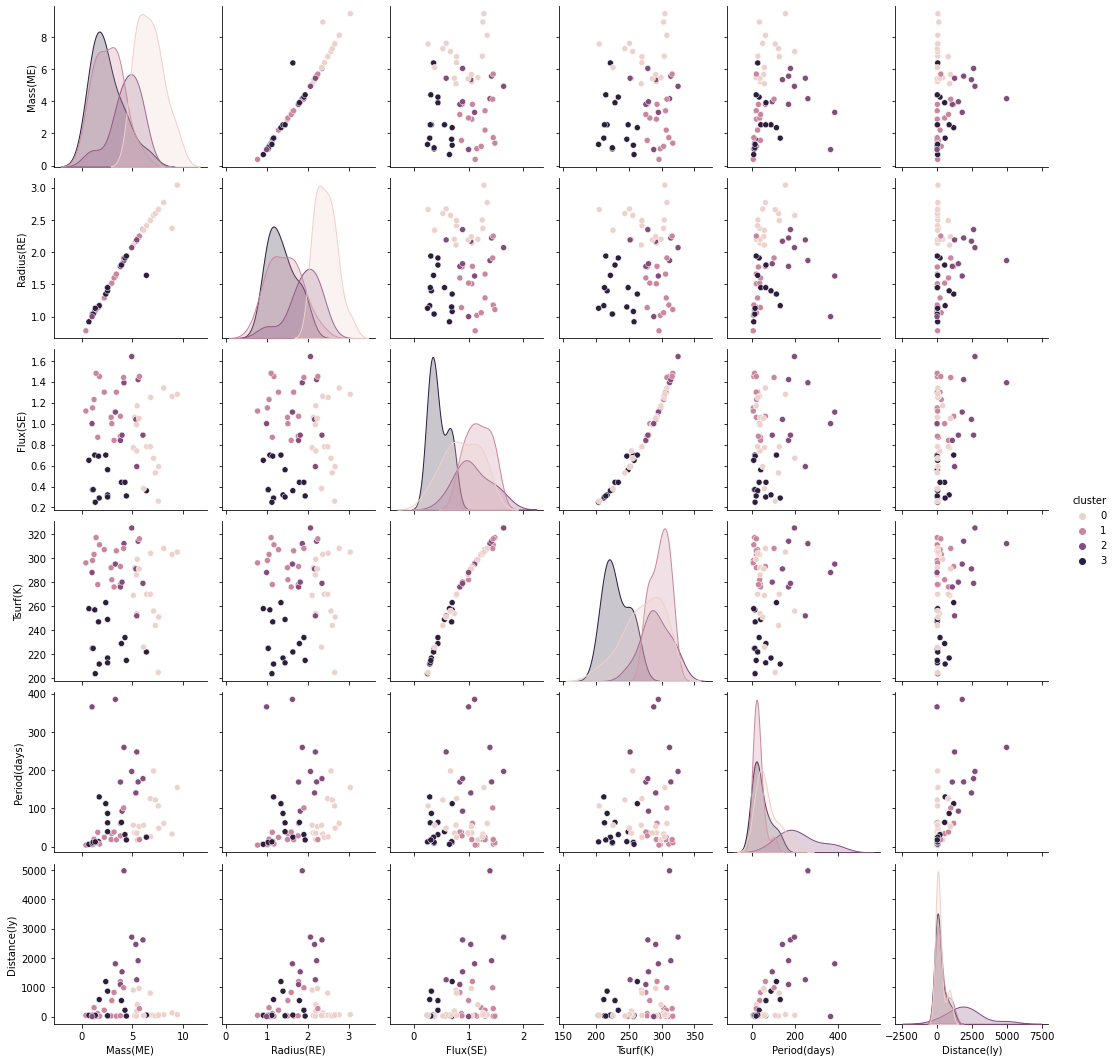

In [474]:
#plotting each variable against each other to get a bird's eye view of what's happening in the clusters.
sns.pairplot(clustered_list, hue ='cluster')




<AxesSubplot:xlabel='Constant', ylabel='Mass(ME)'>

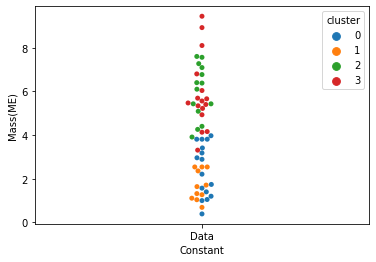

In [520]:
#Attempting to find out what features define a specific cluster, using strip/swarm plots.
clustered_list['Constant'] = 'Data' #just to add something constant for the strip/swarm plots' X-axis.
#The following are swarm plots, in which data ponts don't overlap. This can be used to draw inferences of the different clusters.
sns.swarmplot(x=clustered_list['Constant'],y=clustered_list['Mass(ME)'],hue=clustered_list['cluster'])

<AxesSubplot:xlabel='Constant', ylabel='Radius(RE)'>

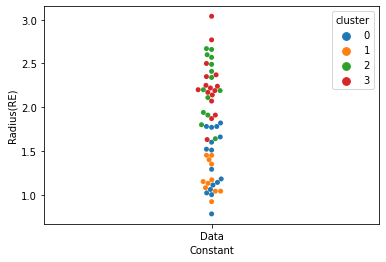

In [521]:
sns.swarmplot(x=clustered_list['Constant'],y=clustered_list['Radius(RE)'],hue=clustered_list['cluster'])

<AxesSubplot:xlabel='Constant', ylabel='Flux(SE)'>

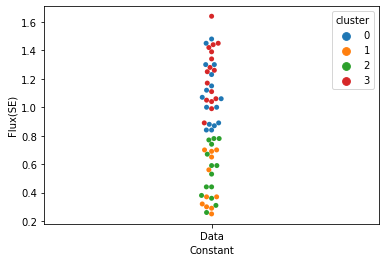

In [522]:
sns.swarmplot(x=clustered_list['Constant'],y=clustered_list['Flux(SE)'],hue=clustered_list['cluster'])

<AxesSubplot:xlabel='Constant', ylabel='Tsurf(K)'>

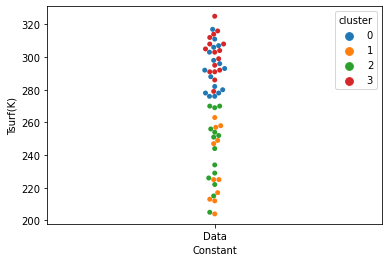

In [523]:
sns.swarmplot(x=clustered_list['Constant'],y=clustered_list['Tsurf(K)'],hue=clustered_list['cluster'])

<AxesSubplot:xlabel='Constant', ylabel='Period(days)'>

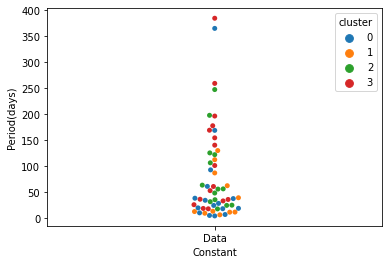

In [524]:
sns.swarmplot(x=clustered_list['Constant'],y=clustered_list['Period(days)'],hue=clustered_list['cluster'])

<AxesSubplot:xlabel='Constant', ylabel='Distance(ly)'>

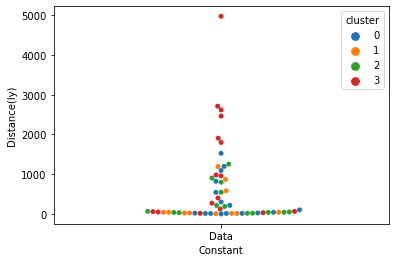

In [525]:
sns.swarmplot(x=clustered_list['Constant'],y=clustered_list['Distance(ly)'],hue=clustered_list['cluster'])

<AxesSubplot:xlabel='Constant', ylabel='Mass(ME)'>

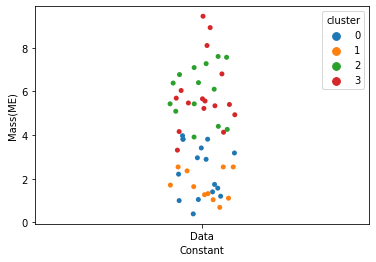

In [526]:
#The following are strip plots in which data points overlap. 
sns.stripplot(x=clustered_list['Constant'],y=clustered_list['Mass(ME)'],hue=clustered_list['cluster'],jitter=True)

<AxesSubplot:xlabel='Constant', ylabel='Radius(RE)'>

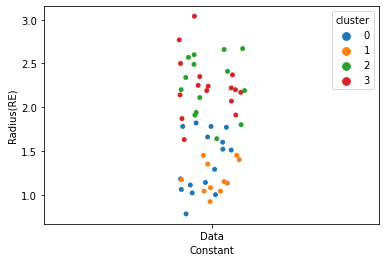

In [527]:
sns.stripplot(x=clustered_list['Constant'],y=clustered_list['Radius(RE)'],hue=clustered_list['cluster'],jitter=True)

<AxesSubplot:xlabel='Constant', ylabel='Flux(SE)'>

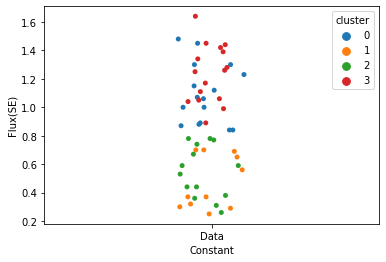

In [528]:
sns.stripplot(x=clustered_list['Constant'],y=clustered_list['Flux(SE)'],hue=clustered_list['cluster'],jitter=True)

<AxesSubplot:xlabel='Constant', ylabel='Tsurf(K)'>

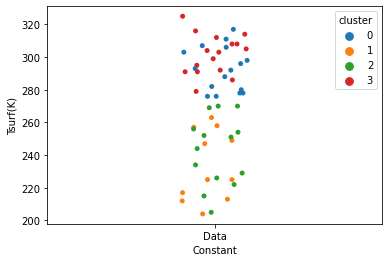

In [529]:
sns.stripplot(x=clustered_list['Constant'],y=clustered_list['Tsurf(K)'],hue=clustered_list['cluster'],jitter=True)

<AxesSubplot:xlabel='Constant', ylabel='Period(days)'>

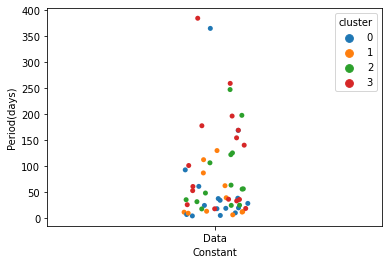

In [530]:
sns.stripplot(x=clustered_list['Constant'],y=clustered_list['Period(days)'],hue=clustered_list['cluster'],jitter=True)

<AxesSubplot:xlabel='Constant', ylabel='Distance(ly)'>

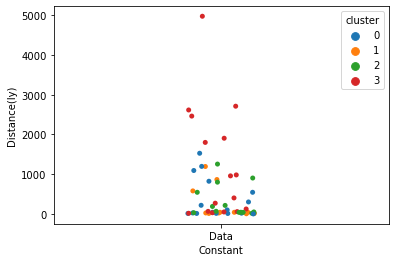

In [531]:
sns.stripplot(x=clustered_list['Constant'],y=clustered_list['Distance(ly)'],hue=clustered_list['cluster'],jitter=True)

In [491]:
exoplanets = df['Name']
exoplanets = pd.concat((exoplanets,cluster),axis = 1)
exoplanets = exoplanets.rename({'Name:':'Planet Name', 0:'Cluster'},axis = 1)
sort_exoplanets = exoplanets.sort_values(['Cluster'])
pd.set_option('display.max_rows',1000)
sort_exoplanets


,Name,Cluster
0,001.iTeegarden'sStarb,0
26,008.iKepler-283c,0
25,007.iKepler-1544b,0
24,006.iGJ667Cc,0
23,005.iKepler-1410b,0
22,004.iWolf1061c,0
21,003.iKepler-1652b,0
10,011.iKepler-296e,0
9,010.iGJ273b,0
56,Earth,0


In [203]:
#References: https://www.kaggle.com/code/ellecf/visualizing-multidimensional-clusters/notebook
#Note: The following three planets were excluded from the clustering dataset as they weere missing a planetary parameter:
#Kepler-62f, Kepler-22b, Kepler-62e